<a href="https://colab.research.google.com/github/kevinketerlondon-tech/Data-Analyst-portfolio/blob/main/week_2_lab_group_12_kevin_keter_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder \
 .appName("DataFrameTutorial") \
 .getOrCreate()

In [5]:
data = [("Alice", 25), ("Bob", 30), ("Cathy", 28)]


In [6]:
rdd = spark.sparkContext.parallelize(data)

In [7]:
from pyspark.sql import Row
df = rdd.map(lambda x: Row(name=x[0], age=x[1])).toDF()

In [8]:
df.show()

+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
|Cathy| 28|
+-----+---+



In [9]:
from google.colab import files
uploaded = files.upload()


Saving Airline_Delay_Cause.csv to Airline_Delay_Cause.csv


In [10]:
df = spark.read.csv("/content/Airline_Delay_Cause.csv", header=True, inferSchema=True)

In [11]:
df.show()

+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|year|month|carrier| carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct|nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|2025|    1|     G4|Allegiant Air|    ELM|Elmira/Corning, N...|         30|        0|       0.0|       0.0|   0.0|        0.0|             0.0|            0|           0|        0|            0|            0|        0|             0|     

In [12]:
df.printSchema()


root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- carrier_name: string (nullable = true)
 |-- airport: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- arr_flights: integer (nullable = true)
 |-- arr_del15: integer (nullable = true)
 |-- carrier_ct: double (nullable = true)
 |-- weather_ct: double (nullable = true)
 |-- nas_ct: double (nullable = true)
 |-- security_ct: double (nullable = true)
 |-- late_aircraft_ct: double (nullable = true)
 |-- arr_cancelled: integer (nullable = true)
 |-- arr_diverted: integer (nullable = true)
 |-- arr_delay: integer (nullable = true)
 |-- carrier_delay: integer (nullable = true)
 |-- weather_delay: integer (nullable = true)
 |-- nas_delay: integer (nullable = true)
 |-- security_delay: integer (nullable = true)
 |-- late_aircraft_delay: integer (nullable = true)



In [13]:
df.select("carrier_name", "arr_delay").show()

+-------------+---------+
| carrier_name|arr_delay|
+-------------+---------+
|Allegiant Air|        0|
|Allegiant Air|        0|
|Allegiant Air|      409|
|Allegiant Air|     1075|
|Allegiant Air|      446|
|Allegiant Air|      447|
|Allegiant Air|      468|
|Allegiant Air|      838|
|Allegiant Air|      440|
|Allegiant Air|    11093|
|Allegiant Air|     2191|
|Allegiant Air|     1036|
|Allegiant Air|      749|
|Allegiant Air|      142|
|Allegiant Air|      294|
|Allegiant Air|        0|
|Allegiant Air|       91|
|Allegiant Air|     3613|
|Allegiant Air|        0|
|Allegiant Air|      226|
+-------------+---------+
only showing top 20 rows


In [14]:
df.filter(df.arr_delay > 25).show()

+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|year|month|carrier| carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct|nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|2025|    1|     G4|Allegiant Air|    EUG|Eugene, OR: Mahlo...|         28|        8|      3.74|       0.0|   1.6|        0.0|            2.66|            2|           0|      409|          236|            0|       70|             0|     

In [15]:
from pyspark.sql import functions as F

In [16]:
df.groupBy("airport").agg(F.avg("arr_flights"), F.avg("arr_del15")).show()

+-------+------------------+------------------+
|airport|  avg(arr_flights)|    avg(arr_del15)|
+-------+------------------+------------------+
|    BGM| 60.31645569620253| 9.814345991561181|
|    INL|51.452229299363054|6.2165605095541405|
|    PSE| 49.96610169491525|13.795221843003413|
|    DLG|25.179640718562876| 4.473053892215569|
|    MSY| 276.7621861152142| 53.76190476190476|
|    PPG|          9.109375| 2.031496062992126|
|    GEG|160.47201584943042| 28.52055473006439|
|    DRT|         52.546875|          6.609375|
|    SNA|  364.215087040619| 58.96827852998066|
|    BUR|329.87045454545455| 57.62514220705347|
|    GTF| 98.98916967509025|14.563176895306858|
|    GRB| 90.66568483063328|18.136430678466077|
|    FOD| 50.02127659574468| 8.638297872340425|
|    IFP|26.071428571428573| 4.857142857142857|
|    IDA|140.37083333333334|          20.68125|
|    GRR|126.73940345368916|26.714678178963894|
|    LWB| 39.26119402985075| 7.485074626865671|
|    PVU| 90.27083333333333|24.645833333

In [17]:
df.orderBy(df.arr_flights.desc()).show()


+----+-----+-------+--------------------+-------+--------------------+-----------+---------+----------+----------+-------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|year|month|carrier|        carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct| nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+-------+--------------------+-------+--------------------+-----------+---------+----------+----------+-------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|2016|    8|     DL|Delta Air Lines Inc.|    ATL|Atlanta, GA: Hart...|      21977|     3307|   1242.16|     89.11| 804.36|       3.33|         1168.04|          598|          23|   395609|       196944|         810

In [18]:
df.dropna().show()


+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|year|month|carrier| carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct|nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|2025|    1|     G4|Allegiant Air|    ELM|Elmira/Corning, N...|         30|        0|       0.0|       0.0|   0.0|        0.0|             0.0|            0|           0|        0|            0|            0|        0|             0|     

In [19]:
df.fillna({"arr_flights": 0}).show()

+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|year|month|carrier| carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct|nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|2025|    1|     G4|Allegiant Air|    ELM|Elmira/Corning, N...|         30|        0|       0.0|       0.0|   0.0|        0.0|             0.0|            0|           0|        0|            0|            0|        0|             0|     

In [20]:
df.withColumn("arr_flight", df.arr_flights + 10).show()


+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+----------+
|year|month|carrier| carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct|nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|arr_flight|
+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+----------+
|2025|    1|     G4|Allegiant Air|    ELM|Elmira/Corning, N...|         30|        0|       0.0|       0.0|   0.0|        0.0|             0.0|            0|           0|        0|            0|           

In [21]:
df.drop("arr_flight").show()

+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|year|month|carrier| carrier_name|airport|        airport_name|arr_flights|arr_del15|carrier_ct|weather_ct|nas_ct|security_ct|late_aircraft_ct|arr_cancelled|arr_diverted|arr_delay|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+-------+-------------+-------+--------------------+-----------+---------+----------+----------+------+-----------+----------------+-------------+------------+---------+-------------+-------------+---------+--------------+-------------------+
|2025|    1|     G4|Allegiant Air|    ELM|Elmira/Corning, N...|         30|        0|       0.0|       0.0|   0.0|        0.0|             0.0|            0|           0|        0|            0|            0|        0|             0|     

In [22]:
from pyspark.sql import functions as F

monthly_delays = (df.groupBy("year", "month").agg(F.sum("arr_del15").alias("total_delayed"),F.sum("arr_flights").alias("total_flights"))
.withColumn("delay_rate", F.col("total_delayed") / F.col("total_flights")
).orderBy("year", "month"))
monthly_delays.show()

+----+-----+-------------+-------------+-------------------+
|year|month|total_delayed|total_flights|         delay_rate|
+----+-----+-------------+-------------+-------------------+
|2003|    6|        89441|       536496|0.16671326533655423|
|2003|    7|       104579|       558568| 0.1872269804213632|
|2003|    8|       106326|       556984|0.19089596828634214|
|2003|    9|        67386|       527714|0.12769416767415684|
|2003|   10|        69394|       552370|0.12562955989644622|
|2003|   11|        96177|       528171|0.18209443532492317|
|2003|   12|       120668|       555495|0.21722607764246302|
|2004|    1|       128236|       583987| 0.2195870798493802|
|2004|    2|       114517|       553876|0.20675566372256607|
|2004|    3|       104031|       601412|0.17297792528250183|
|2004|    4|        93754|       582970| 0.1608213115597715|
|2004|    5|       121019|       594457|0.20357906459171984|
|2004|    6|       148726|       588792|0.25259514395576027|
|2004|    7|       13599

In [23]:
monthly_pd = monthly_delays.toPandas()

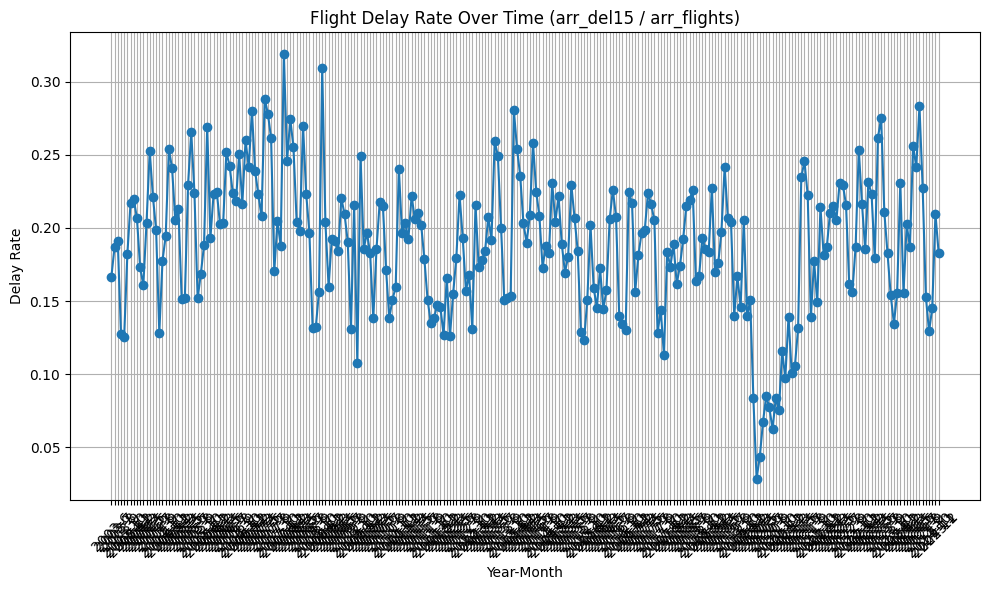

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(
    monthly_pd['year'].astype(str) + "-" + monthly_pd['month'].astype(str),
    monthly_pd['delay_rate'],
    marker='o'
)
plt.title("Flight Delay Rate Over Time (arr_del15 / arr_flights)")
plt.xlabel("Year-Month")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
airline_delays = df.groupBy("carrier_name").agg(
    F.sum("arr_del15").alias("total_delays"),
    F.sum("arr_flights").alias("total_flights")
)

In [26]:
airline_delays = airline_delays.withColumn(
    "delay_percentage",
    (F.col("total_delays") / F.col("total_flights")) * 100
)

In [27]:
airline_delays = airline_delays.orderBy(F.col("delay_percentage").desc())

In [28]:
print("Top 5 Airlines by Delay Percentage:")
airline_delays.select("carrier_name", "delay_percentage").show(5, truncate=False)

Top 5 Airlines by Delay Percentage:
+---------------------------+------------------+
|carrier_name               |delay_percentage  |
+---------------------------+------------------+
|Peninsula Airways Inc.     |31.453362255965295|
|Frontier Airlines          |26.217934309640313|
|Trans States Airlines      |24.601623825085063|
|Atlantic Southeast Airlines|24.466134918919945|
|JetBlue Airways            |24.389088645960562|
+---------------------------+------------------+
only showing top 5 rows


In [31]:
d_airlines = airline_delays.toPandas()

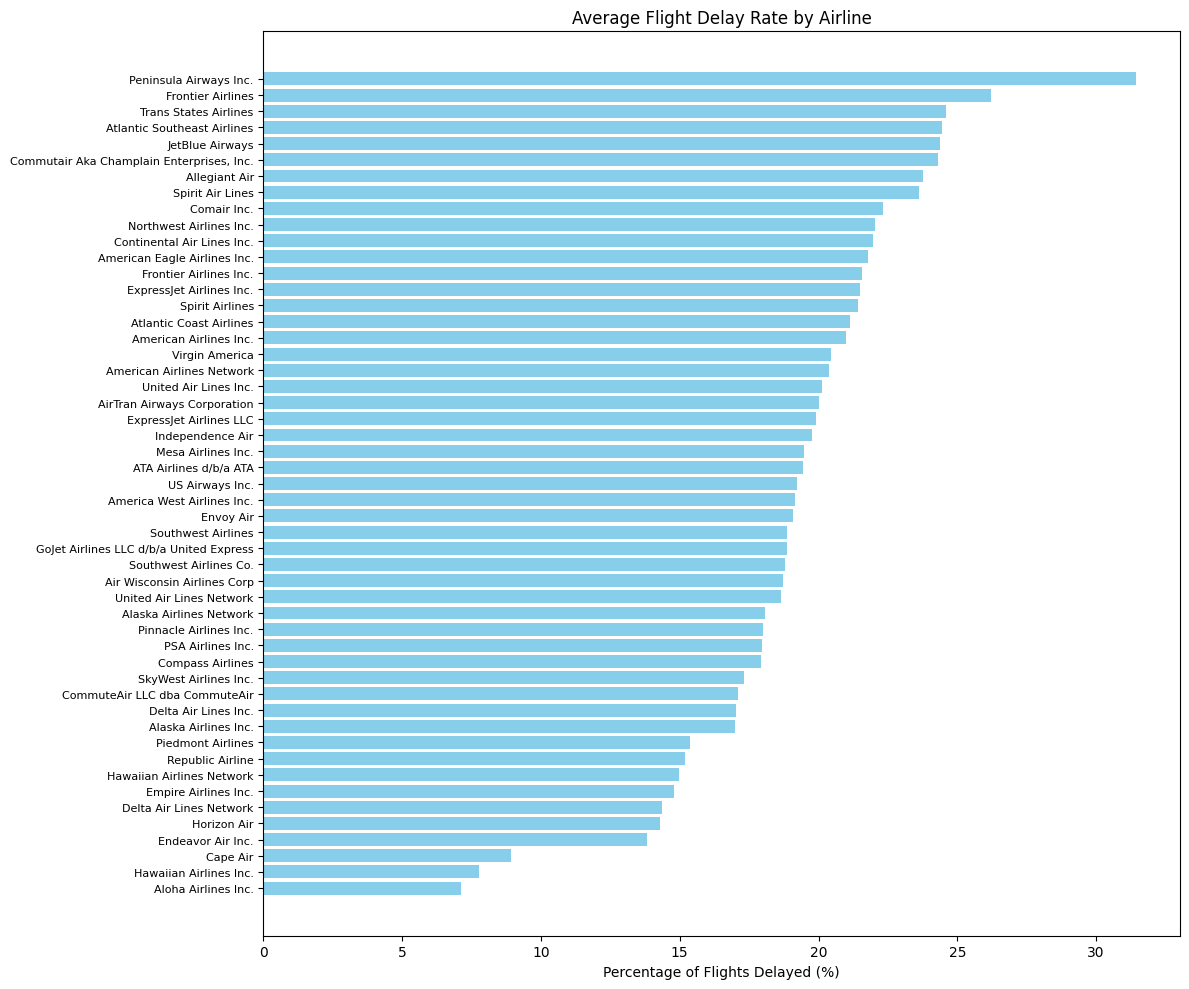

In [32]:
plt.figure(figsize=(12, 10))
plt.barh(d_airlines['carrier_name'], d_airlines['delay_percentage'], color='skyblue')


plt.tick_params(axis='y', labelsize=8)

plt.xlabel("Percentage of Flights Delayed (%)")
plt.title("Average Flight Delay Rate by Airline")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [37]:
carrier_blame = df.groupBy("carrier_name").agg(
    F.sum("carrier_ct").alias("total_carrier_delays"),
    F.sum("arr_flights").alias("total_flights")
)
carrier_blame.show()

+--------------------+--------------------+-------------+
|        carrier_name|total_carrier_delays|total_flights|
+--------------------+--------------------+-------------+
|GoJet Airlines LL...|  21781.600000000042|       426823|
|Hawaiian Airlines...|   43501.93999999991|       501382|
|Alaska Airlines N...|            72186.05|      1575469|
|   Endeavor Air Inc.|   67880.70000000006|      1753519|
|CommuteAir LLC db...|  10017.630000000016|       162654|
|       Allegiant Air|   48439.50000000007|       774867|
|Delta Air Lines N...|  338247.55999999994|      6234005|
|American Eagle Ai...|  280421.53999999946|      5184465|
|SkyWest Airlines ...|   873465.6399999987|     13606982|
|      Virgin America|  15351.159999999985|       389060|
|   PSA Airlines Inc.|   78784.64999999986|      1640351|
|         Horizon Air|   28227.99000000001|       690605|
|United Air Lines ...|   383910.7000000003|      7008520|
|American Airlines...|   394088.7200000002|      6043869|
|   Piedmont A

In [40]:
carrier_blame = carrier_blame.withColumn(
    "carrier_delay_rate",
    (F.col("total_carrier_delays") / F.col("total_flights")) * 100
)
carrier_blame.show()

+--------------------+--------------------+-------------+------------------+
|        carrier_name|total_carrier_delays|total_flights|carrier_delay_rate|
+--------------------+--------------------+-------------+------------------+
|GoJet Airlines LL...|  21781.600000000042|       426823|5.1031926583150495|
|Hawaiian Airlines...|   43501.93999999991|       501382| 8.676406412675346|
|Alaska Airlines N...|            72186.05|      1575469| 4.581876888723295|
|   Endeavor Air Inc.|   67880.70000000006|      1753519|3.8711128878557948|
|CommuteAir LLC db...|  10017.630000000016|       162654| 6.158858681618661|
|       Allegiant Air|   48439.50000000007|       774867| 6.251330873556375|
|Delta Air Lines N...|  338247.55999999994|      6234005| 5.425846787097539|
|American Eagle Ai...|  280421.53999999946|      5184465| 5.408880954929765|
|SkyWest Airlines ...|   873465.6399999987|     13606982|   6.4192459430019|
|      Virgin America|  15351.159999999985|       389060| 3.945705032642776|

In [41]:
carrier_blame = carrier_blame.orderBy(F.col("carrier_delay_rate").desc())

In [42]:
print("Top 5 Airlines by Carrier-Caused Delay Rate:")
carrier_blame.select("carrier_name", "carrier_delay_rate").show(5, truncate=False)

Top 5 Airlines by Carrier-Caused Delay Rate:
+---------------------------+------------------+
|carrier_name               |carrier_delay_rate|
+---------------------------+------------------+
|Peninsula Airways Inc.     |10.37713046172916 |
|Hawaiian Airlines Network  |8.676406412675346 |
|Atlantic Southeast Airlines|8.643863173500305 |
|Comair Inc.                |8.279039068357735 |
|Mesa Airlines Inc.         |7.747854869203611 |
+---------------------------+------------------+
only showing top 5 rows


In [44]:
air_blame = carrier_blame.toPandas()

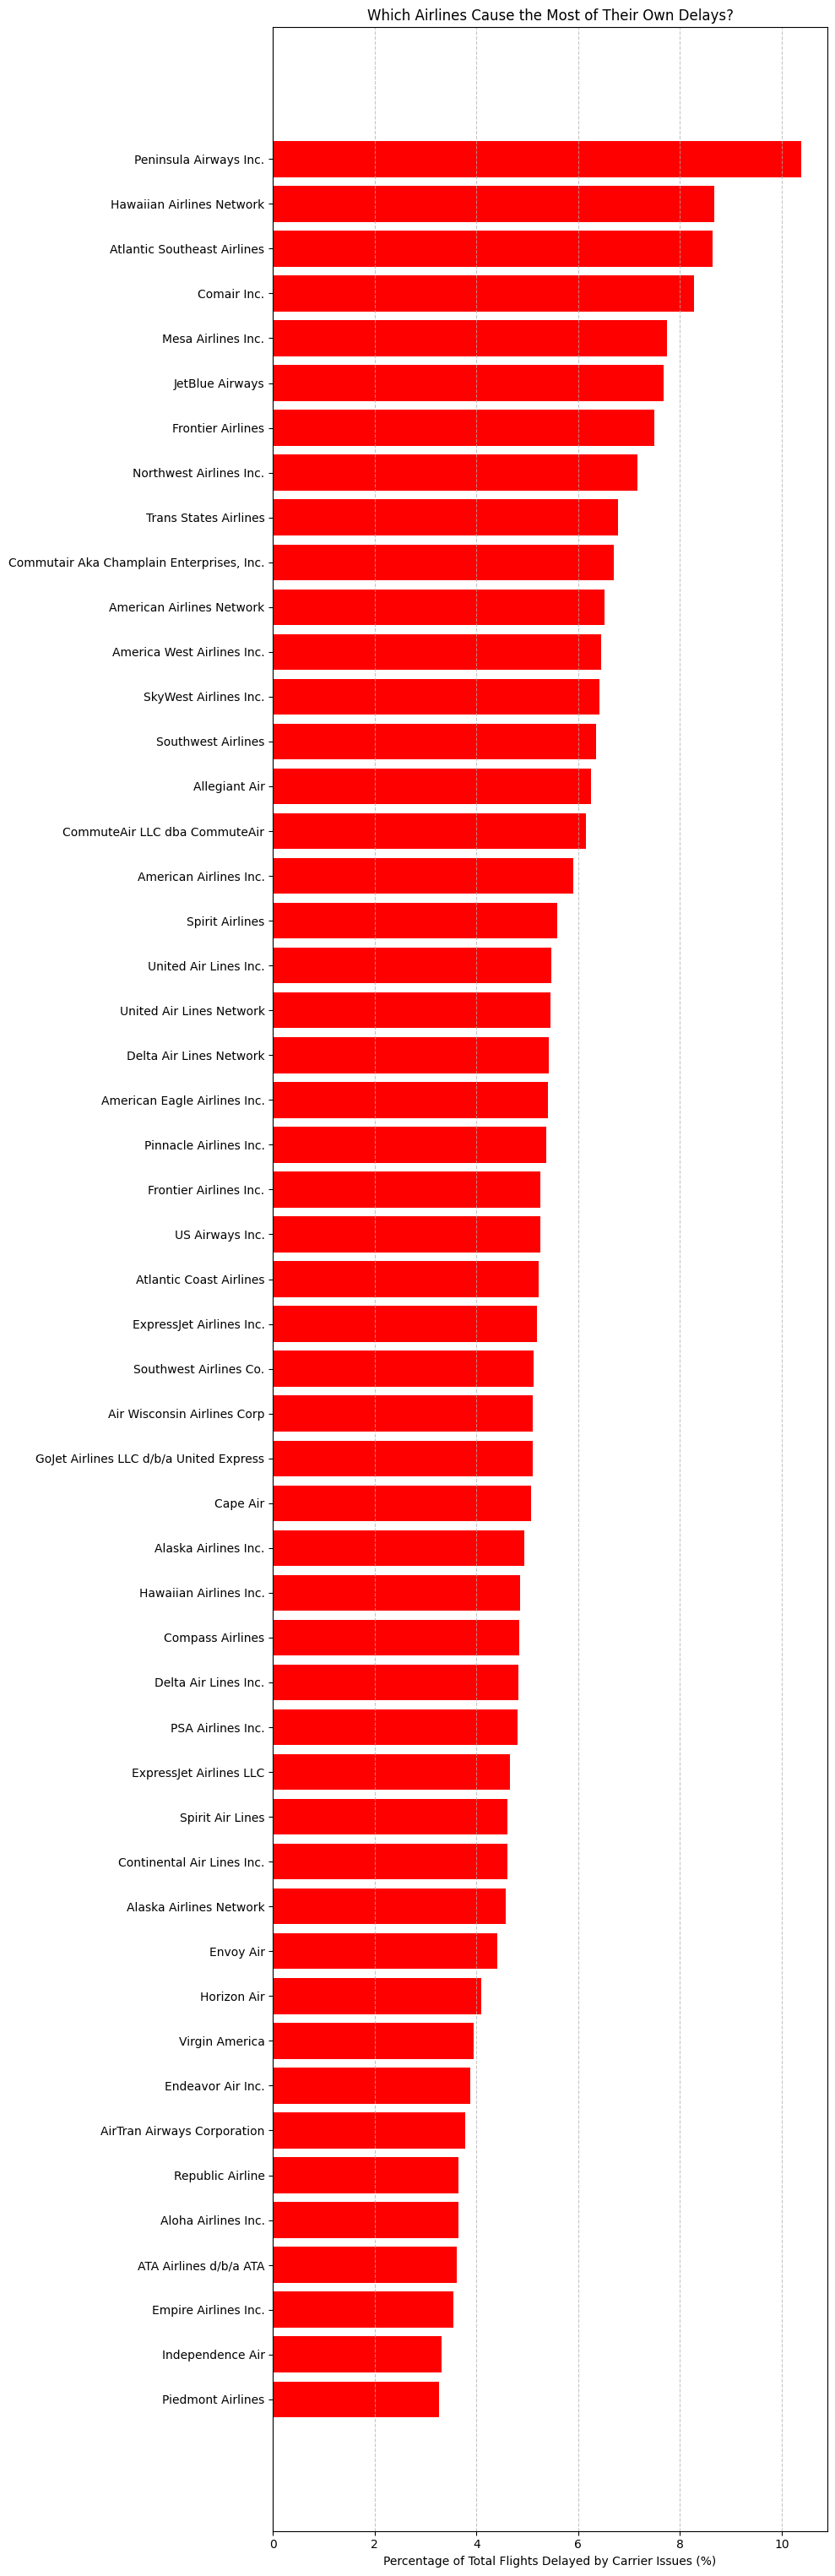

In [46]:
plt.figure(figsize=(10, len(air_blame) * 0.6))
plt.barh(air_blame['carrier_name'], air_blame['carrier_delay_rate'], color='red')

plt.xlabel("Percentage of Total Flights Delayed by Carrier Issues (%)")
plt.title("Which Airlines Cause the Most of Their Own Delays?")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
import numpy as np
import pandas as pd
df_pandas = pd.DataFrame(np.random.randint(0,200,size=(100000, 5)), columns=list('ABCDE'))

In [57]:
data = [[295, "South Bend", "Indiana",  101190, 112.9]]
columns = ["rank", "city", "state",  "population", "price"]

df1 = spark.createDataFrame(data, schema="rank LONG, city STRING, state STRING,  population LONG, price DOUBLE")
display(df1)
df1.show()


DataFrame[rank: bigint, city: string, state: string, population: bigint, price: double]

+----+----------+-------+----------+-----+
|rank|      city|  state|population|price|
+----+----------+-------+----------+-----+
| 295|South Bend|Indiana|    101190|112.9|
+----+----------+-------+----------+-----+



In [58]:
df2 = spark.createDataFrame(df_pandas)
df2.show()

+---+---+---+---+---+
|  A|  B|  C|  D|  E|
+---+---+---+---+---+
| 56| 73|155| 56|117|
|164| 56| 81|164| 53|
|151|138| 41| 40|103|
| 26| 58|185|198|119|
|117|110| 72|163|109|
| 37|108|112|190| 83|
|138|104| 46| 83| 98|
|  5| 78|182| 94|176|
|106| 18| 18| 47| 61|
| 72| 58| 95|153| 61|
|112|186| 68| 30|167|
|189|183| 26|183|186|
| 98| 56|111| 43|108|
|101| 60| 65| 56| 38|
| 94| 31| 70|  1| 53|
| 84| 62| 45|185| 74|
| 76|112| 52|141|165|
|161|173|135|  8|128|
|139| 15|184| 41| 90|
|197| 89| 16| 42| 85|
+---+---+---+---+---+
only showing top 20 rows


In [59]:
print(df2.count())

100000


In [60]:
print("rows in df1",df1.count())
df1.show()

rows in df1 1
+----+----------+-------+----------+-----+
|rank|      city|  state|population|price|
+----+----------+-------+----------+-----+
| 295|South Bend|Indiana|    101190|112.9|
+----+----------+-------+----------+-----+



In [61]:
print("rows in df2",df.count())
df2.show()

rows in df2 398233
+---+---+---+---+---+
|  A|  B|  C|  D|  E|
+---+---+---+---+---+
| 56| 73|155| 56|117|
|164| 56| 81|164| 53|
|151|138| 41| 40|103|
| 26| 58|185|198|119|
|117|110| 72|163|109|
| 37|108|112|190| 83|
|138|104| 46| 83| 98|
|  5| 78|182| 94|176|
|106| 18| 18| 47| 61|
| 72| 58| 95|153| 61|
|112|186| 68| 30|167|
|189|183| 26|183|186|
| 98| 56|111| 43|108|
|101| 60| 65| 56| 38|
| 94| 31| 70|  1| 53|
| 84| 62| 45|185| 74|
| 76|112| 52|141|165|
|161|173|135|  8|128|
|139| 15|184| 41| 90|
|197| 89| 16| 42| 85|
+---+---+---+---+---+
only showing top 20 rows


In [62]:
df3 = df2.union(df1)
print("rows in df3")
print(df3.count())
df3.show()
print("showing the data frame from the bottom")

rows in df3
100001
+---+---+---+---+-----+
|  A|  B|  C|  D|    E|
+---+---+---+---+-----+
| 56| 73|155| 56|117.0|
|164| 56| 81|164| 53.0|
|151|138| 41| 40|103.0|
| 26| 58|185|198|119.0|
|117|110| 72|163|109.0|
| 37|108|112|190| 83.0|
|138|104| 46| 83| 98.0|
|  5| 78|182| 94|176.0|
|106| 18| 18| 47| 61.0|
| 72| 58| 95|153| 61.0|
|112|186| 68| 30|167.0|
|189|183| 26|183|186.0|
| 98| 56|111| 43|108.0|
|101| 60| 65| 56| 38.0|
| 94| 31| 70|  1| 53.0|
| 84| 62| 45|185| 74.0|
| 76|112| 52|141|165.0|
|161|173|135|  8|128.0|
|139| 15|184| 41| 90.0|
|197| 89| 16| 42| 85.0|
+---+---+---+---+-----+
only showing top 20 rows
showing the data frame from the bottom


In [64]:
Totpartition=df.rdd.getNumPartitions()
print(Totpartition)
newpartitiondf = df.repartition(4)

print(newpartitiondf.rdd.getNumPartitions())

2
4


In [66]:
df4 = df1.repartition(4, "city")
print(df4.rdd.getNumPartitions())

4
